# 02 - Exploratory Data Analysis (EDA)

### Objective
This notebook explores the cleaned and merged dataset containing daily weather parameters and corresponding solar energy generation for Ireland in 2024.  
The goal is to understand the data's structure, identify trends and patterns, and uncover relationships between variables that can inform modeling strategy.

---

### Key Steps

**Dataset Overview**
   - Use `pandas` to inspect data shape, column types, missing values, and summary statistics.
   - Examine basic distributions of key variables like `solargen`, `glorad`, `maxtp`, `rain`.

**Correlation & Linear Relationships**
   - Use `.corr()` and `matplotlib` to create a correlation heatmap.
   - Generate scatter plots (e.g., `glorad` vs. `solargen`) to visually assess linear relationships.

**Outlier & Distribution Inspection**
   - Use histograms and boxplots (via `matplotlib.pyplot`) to explore distributions and detect outliers for each variable.

**Initial Observations**
   - Summarise key findings, strong predictors, and potential data quality concerns.
   - Identify which weather variables are promising candidates for the regression model.

---

**Input**: `Cleaned_National_Irish_Weather_Solar_2024.csv` (daily aggregated weather and solar generation)  
**Output**: Graphs, correlations, and insights to guide feature selection for modeling in the next notebook.

## 01: Add necessary libraries for EDA and Load Cleaned_National_Irish_Weather_Solar_2024.csv
- numpy, pandas, matplotlib, statsmodels
- Load clean dataset + view info

In [7]:
# Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Statsmodels (for statistical analysis)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


In [8]:
# Load Cleaned Data and view head
file_path = "../Cleaned Data/Cleaned_National_Irish_Weather_Solar_2024.csv"
df = pd.read_csv(file_path)

df.head()

,date,rain,maxtp,mintp,cbl,glorad,solargen
0,1/01/2024,11.93,10.57,3.03,981.90,64.44,471.02
1,2/01/2024,5.77,10.22,6.53,973.32,125.44,601.80
2,3/01/2024,2.10,9.21,5.46,981.98,210.22,1286.11
3,4/01/2024,1.18,8.17,2.52,991.51,309.00,2788.48
4,5/01/2024,0.36,8.18,2.28,1001.11,314.89,2966.48


In [9]:
# Check for null values
print(df.isnull().sum())

date        0
rain        0
maxtp       0
mintp       0
cbl         0
glorad      0
solargen    0
dtype: int64


## 01.5 Visualise the data (retrospectively)

### Create a Histogram of Daily Solar Generation

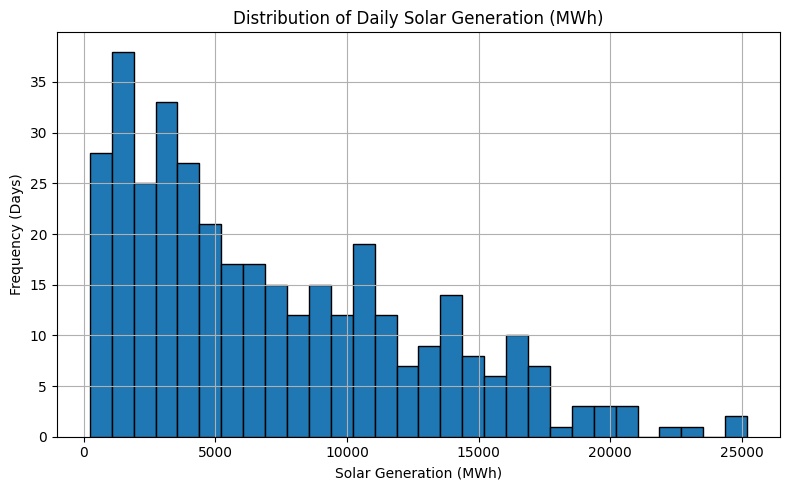

In [10]:
# Histogram of daily solar generation
plt.figure(figsize=(8, 5))
plt.hist(df['solargen'], bins=30, edgecolor='black')
plt.title('Distribution of Daily Solar Generation (MWh)')
plt.xlabel('Solar Generation (MWh)')
plt.ylabel('Frequency (Days)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../Outputs/Figures/EDA/eda_histogram_solargen.png', dpi=300)
plt.show()

### Create a Boxplot of Global Radiation

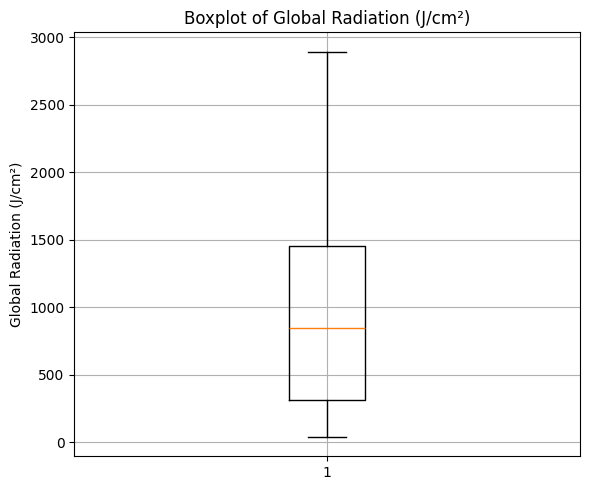

In [11]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['glorad'], vert=True)
plt.title('Boxplot of Global Radiation (J/cm²)')
plt.ylabel('Global Radiation (J/cm²)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../Outputs/Figures/EDA/eda_boxplot_glorad.png', dpi=300)
plt.show()

### Create a Boxplot of Maximum Temperature

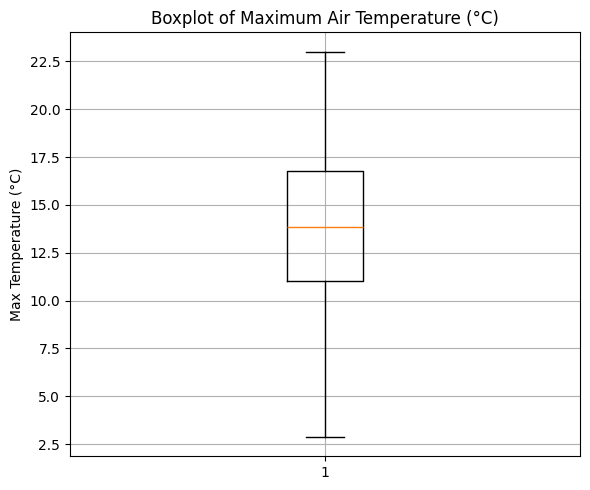

In [12]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['maxtp'], vert=True)
plt.title('Boxplot of Maximum Air Temperature (°C)')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../Outputs/Figures/EDA/eda_boxplot_maxtp.png', dpi=300)
plt.show()

### Create a Boxplot of Rainfall

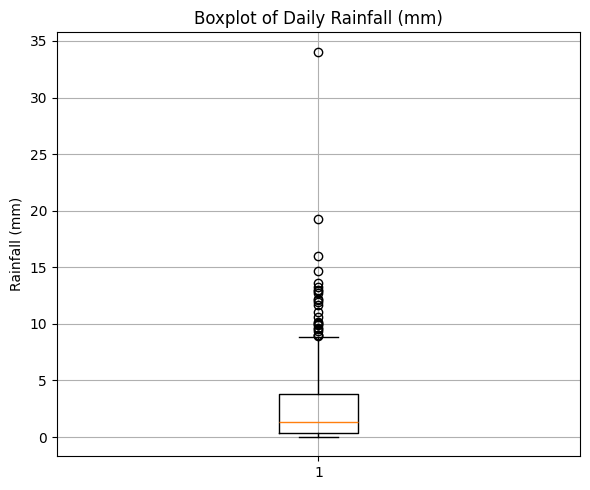

In [13]:
plt.figure(figsize=(6, 5))
plt.boxplot(df['rain'], vert=True)
plt.title('Boxplot of Daily Rainfall (mm)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.tight_layout()
plt.savefig('../Outputs/Figures/EDA/eda_boxplot_rain.png', dpi=300)
plt.show()

### Observation
- highly skewed and sparse distribution, with the majority of daily values clustered at or near 0 mm.
- Notably, many of these outliers were aligned along the median, suggesting that 0 mm rainfall days dominate the dataset.

## 02: Individual OLS for each predictor 
- Fit each predictor to the target variable: solargen
- Observe results for relationship information

### Fit Regression: glorad
- Target: solargen - Predictor: glorad

In [14]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'glorad': df['glorad']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     806.9
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.24e-94
Time:                        13:03:09   Log-Likelihood:                -3453.2
No. Observations:                 366   AIC:                             6910.
Df Residuals:                     364   BIC:                             6918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    938.4239    271.730      3.454      0.001     404.066    1472.782
glorad         6.6775      0.235     28.406      0.000       6.215       7.140
==============================================================================
Omnibus:                       25.985   Durbin-Watson:                   0.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.631
Skew:                           0.394   Prob(JB):                     3.73e-12
Kurtosis:                       4.683   Cond. No.                     1.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observed Result: glorad
glorad shows a strong positive relationship with solargen (R² = 0.689, p < 0.001)
R² (0.689) indicates it explains nearly 69% of the variation in solar generation.

### Fit Regression: cbl
Target: solargen - Predictor: cbl

In [15]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'cbl': df['cbl']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.187
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.140
Time:                        13:03:09   Log-Likelihood:                -3665.9
No. Observations:                 366   AIC:                             7336.
Df Residuals:                     364   BIC:                             7344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.753e+04   2.35e+04     -1.172      0.242   -7.37e+04    1.87e+04
cbl           34.5634     23.372      1.479      0.140     -11.397      80.524
==============================================================================
Omnibus:                       29.884   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.673
Skew:                           0.759   Prob(JB):                     1.79e-08
Kurtosis:                       2.816   Cond. No.                     8.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observed Result: cbl
cbl shows a weak positive relationship with solargen (R² = 0.006, p = 0.140)  
Low R² (0.006) indicates it explains less than 1% of the variation in solar generation.

### Fit Regression: mintp
Target: solargen - Predictor: mintp

In [16]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'mintp': df['mintp']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     61.81
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           4.33e-14
Time:                        13:03:09   Log-Likelihood:                -3638.3
No. Observations:                 366   AIC:                             7281.
Df Residuals:                     364   BIC:                             7288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3435.3427    546.737      6.283      0.000    2360.183    4510.503
mintp        537.1715     68.324      7.862      0.000     402.812     671.531
==============================================================================
Omnibus:                       19.671   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.932
Skew:                           0.595   Prob(JB):                     1.73e-05
Kurtosis:                       2.859   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observed Result: mintp
mintp shows a statistically significant positive relationship with solargen (p < 0.001)  
Low R² (0.145) indicates it explains only a small portion of the variation.mintp shows a statistically significant positive relationship 

### Fit Regression: maxtp
Target: solargen - Predictor: maxtp

In [17]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'maxtp': df['maxtp']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     356.5
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           6.31e-56
Time:                        13:03:09   Log-Likelihood:                -3542.1
No. Observations:                 366   AIC:                             7088.
Df Residuals:                     364   BIC:                             7096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5361.0140    695.476     -7.708      0.000   -6728.670   -3993.358
maxtp        915.1232     48.465     18.882      0.000     819.816    1010.430
==============================================================================
Omnibus:                        8.918   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.075
Skew:                           0.303   Prob(JB):                       0.0176
Kurtosis:                       2.597   Cond. No.                         49.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observed Result: maxtp
maxtp shows a strong positive relationship with solargen (R² = 0.495, p < 0.001)  
R² (0.495) indicates it explains nearly 50% of the variation in solar generation.

### Fit Regression: rain
Target: solargen - Predictor: rain

In [18]:
# Create X intercept
X = pd.DataFrame({'intercept': np.ones(df.shape[0]),
'rain': df['rain']})

# Create y intercept
y = df['solargen']

# Specify the model using X,y from above
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# View Results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     37.86
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.01e-09
Time:                        13:03:09   Log-Likelihood:                -3648.9
No. Observations:                 366   AIC:                             7302.
Df Residuals:                     364   BIC:                             7310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8436.4541    337.146     25.023      0.000    7773.455    9099.454
rain        -459.3200     74.654     -6.153      0.000    -606.127    -312.513
==============================================================================
Omnibus:                       24.322   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.823
Skew:                           0.667   Prob(JB):                     9.09e-07
Kurtosis:                       2.782   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observed Result: rain
rain shows a negative relationship with solargen (R² = 0.094, p < 0.001)  
R² (0.094) indicates it explains just under 10% of the variation in solar generation.

### R² from Simple OLS Regressions Plot

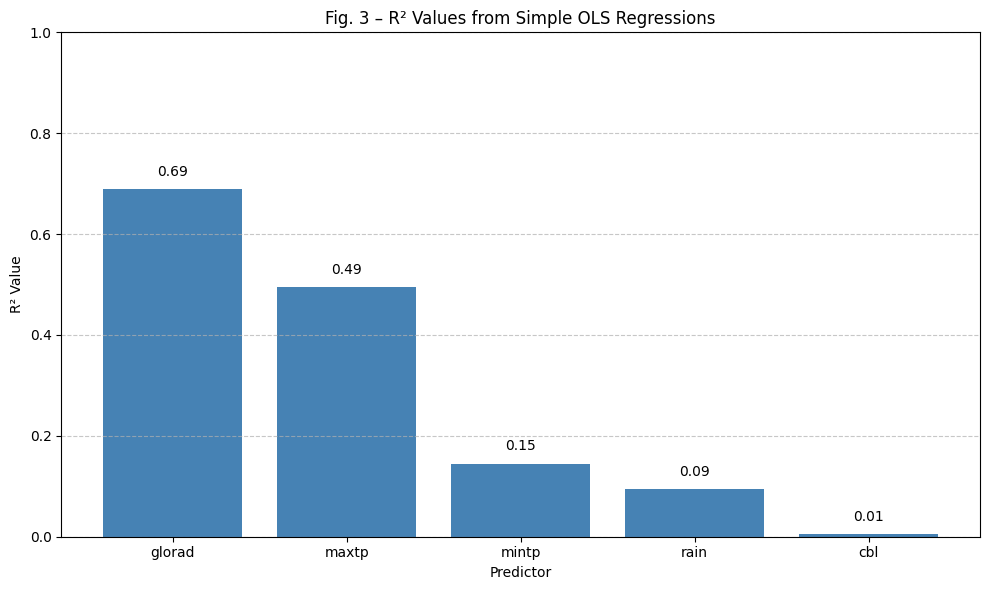

In [19]:
# Define predictors to evaluate
predictors = ['glorad', 'maxtp', 'mintp', 'rain', 'cbl']
r_squared = []

# Loop through predictors and compute R2 from simple OLS
for predictor in predictors:
    X = sm.add_constant(df[predictor])
    y = df['solargen']
    model = sm.OLS(y, X).fit()
    r_squared.append(model.rsquared)

# Create a DataFrame to hold results
r2_df = pd.DataFrame({
    'Predictor': predictors,
    'R_squared': r_squared
}).sort_values(by='R_squared', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(r2_df['Predictor'], r2_df['R_squared'], color='steelblue')
plt.title('Fig. 3 – R² Values from Simple OLS Regressions')
plt.xlabel('Predictor')
plt.ylabel('R² Value')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with R² values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", 
             ha='center', va='bottom', fontsize=10)

# Save figure
output_path = '../Outputs/Figures/EDA/Fig3_R2_Simple_OLS.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

### Create Correlation Matrix
- Observe for signs of multicollinearity

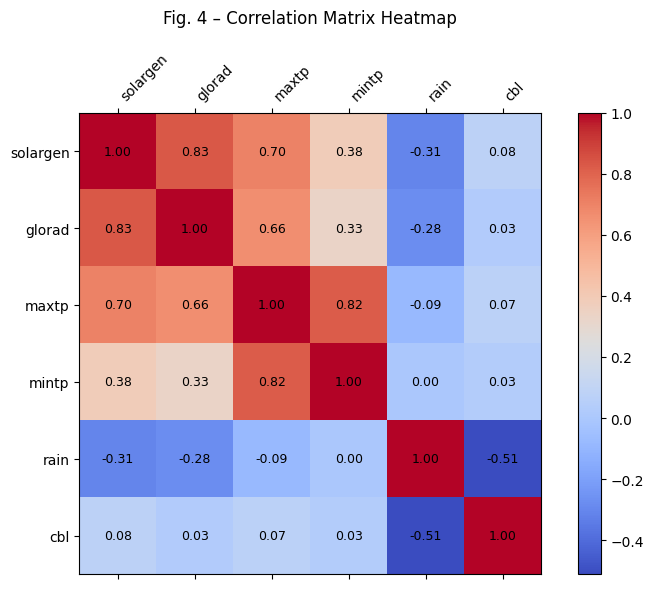

In [20]:
# Select features
corr_features = ['solargen', 'glorad', 'maxtp', 'mintp', 'rain', 'cbl']
corr_matrix = df[corr_features].corr()

# Plot heatmap with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Add colorbar
plt.colorbar(cax)

# Set ticks and labels
ax.set_xticks(range(len(corr_features)))
ax.set_yticks(range(len(corr_features)))
ax.set_xticklabels(corr_features, rotation=45, ha='left')
ax.set_yticklabels(corr_features)

# Annotate each cell with correlation coefficient
for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=9)

plt.title('Fig. 4 – Correlation Matrix Heatmap', pad=20)
plt.tight_layout()

# Save figure
output_path = '../Outputs/Figures/EDA/Fig4_Correlation_Heatmap.png'
plt.savefig(output_path, dpi=300)
plt.show()

## 03: Multiple OLS
1. Fit all predictors to the target variable: solargen
2. Fit only strongly correlated predictors to the target variable: solargen
- Observe results
- Use results to inform feature selection

### Fit Regression: rain, maxtp, mintp,	cbl, glorad (all predictors)
Target: solargen - Predictor: all

In [21]:
import pandas as pd
import statsmodels.api as sm

# Define predictors and response
X = df[['rain', 'maxtp', 'mintp', 'cbl', 'glorad']]  # All 5 predictors
# Add x intercept
X = sm.add_constant(X)
# define y  
y = df['solargen']

# Fit model
model_full = sm.OLS(y, X)
results_full = model_full.fit()

# View summary
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     224.7
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          2.50e-108
Time:                        13:03:11   Log-Likelihood:                -3407.9
No. Observations:                 366   AIC:                             6828.
Df Residuals:                     360   BIC:                             6851.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.369e+04    1.4e+04      0.979      0.328   -1.38e+04    4.12e+04
rain        -206.5402     48.737     -4.238      0.000    -302.386    -110.695
maxtp        731.1189     87.610      8.345      0.000     558.827     903.411
mintp       -342.0849     74.220     -4.609      0.000    -488.044    -196.125
cbl          -17.2574     13.913     -1.240      0.216     -44.618      10.103
glorad         4.0216      0.345     11.673      0.000       3.344       4.699
==============================================================================
Omnibus:                       13.772   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.181
Skew:                           0.326   Prob(JB):                     0.000113
Kurtosis:                       3.876   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Observed Result: rain, maxtp, mintp,	cbl, glorad (all predictors)
Strong linear relationship observed between predictors and solar generation (R² = 0.757, p < 0.001).  
This model explains approximately 76% of the variation in solar generation.  
maxtp, mintp, glorad, and rain are all statistically significant predictors (p < 0.001).  
cbl is not statistically significant (p = 0.216), suggesting it has limited explanatory power.  
High F-statistic (224.7) and very low p-value (p < 0.001) indicate the model fits the data well overall.

Next step: Remove cbl and refit the model to assess impact on adjusted R² and model fit.

### Remove CBL (weak predictor)
- Observe results

In [22]:
# Drop 'cbl' due to weak contribution
X_reduced = df[['rain', 'maxtp', 'mintp', 'glorad']]
X_reduced = sm.add_constant(X_reduced)
y = df['solargen']

# fit model
model_reduced = sm.OLS(y, X_reduced)
results_reduced = model_reduced.fit()

# View summary
results_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          3.01e-109
Time:                        13:03:11   Log-Likelihood:                -3408.7
No. Observations:                 366   AIC:                             6827.
Df Residuals:                     361   BIC:                             6847.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3643.9183    615.810     -5.917      0.000   -4854.944   -2432.893
rain        -173.6311     40.914     -4.244      0.000    -254.090     -93.172
maxtp        712.7087     86.408      8.248      0.000     542.782     882.635
mintp       -333.4473     73.948     -4.509      0.000    -478.870    -188.025
glorad         4.1219      0.335     12.299      0.000       3.463       4.781
==============================================================================
Omnibus:                       13.775   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.059
Skew:                           0.309   Prob(JB):                     7.27e-05
Kurtosis:                       3.932   Cond. No.                     5.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observed Result: rain, maxtp, mintp, glorad (Reduced predictor)  
### (cbl dropped)

Almost no loss in explanatory power compared to the full model (Adj. R² was 0.754 with all 5 predictors).  
All remaining predictors are highly significant (p < 0.001): This confirms that cbl was not contributing meaningfully, and dropping it was appropriate.

Strong overall model fit (R² = 0.756, p < 0.001) indicating the model explains ~75% of the variation in solar generation.

There’s no immediate statistical reason to remove any of the remaining predictors.

Next step: Create Diagnostic Plots for further analysis of reduced model.

### Scatter Plots of Key Predictors vs. SolarGen

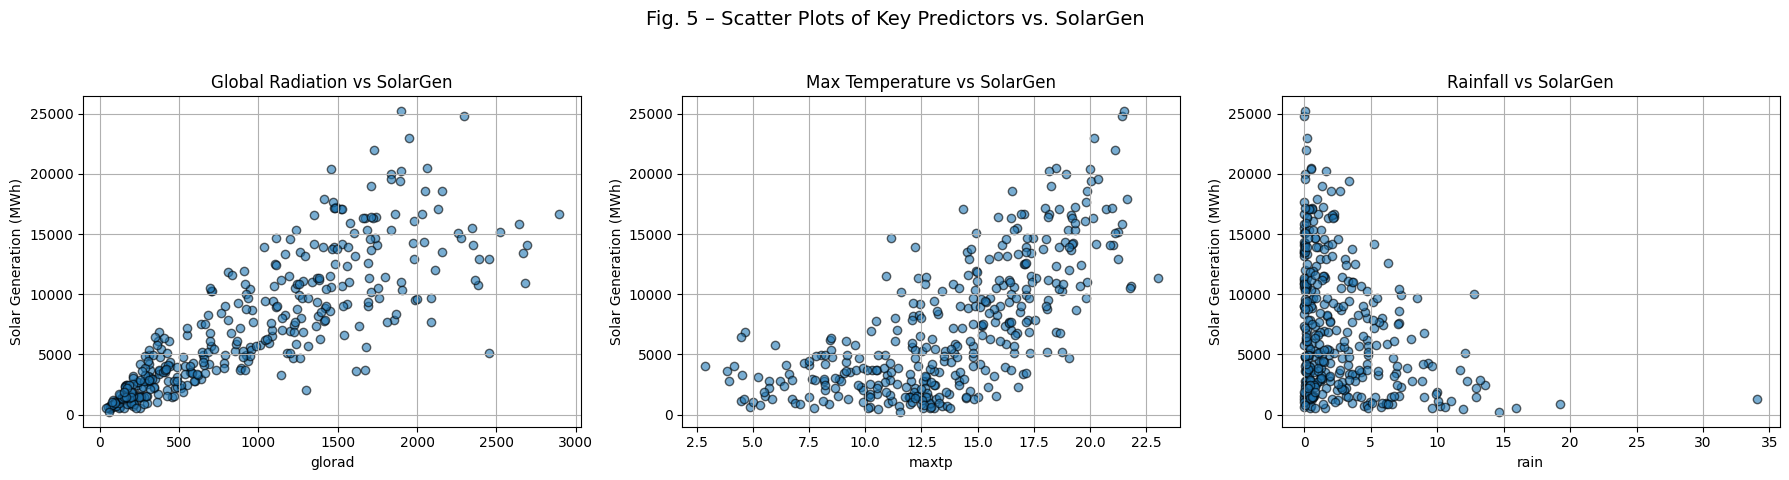

In [23]:
# Set up figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
predictors = ['glorad', 'maxtp', 'rain']
titles = ['Global Radiation vs SolarGen',
          'Max Temperature vs SolarGen',
          'Rainfall vs SolarGen']

for i, predictor in enumerate(predictors):
    axes[i].scatter(df[predictor], df['solargen'], alpha=0.6, edgecolor='k')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Solar Generation (MWh)')
    axes[i].set_title(titles[i])
    axes[i].grid(True)

plt.suptitle('Fig. 5 – Scatter Plots of Key Predictors vs. SolarGen', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save figure
output_path = '../Outputs/Figures/EDA/Fig5_Scatter_KeyPredictors_vs_SolarGen.png'
plt.savefig(output_path, dpi=300)
plt.show()

## 04: Diagnostic Plots for Reduced Model
- Residuals vs Fitted
- Residuals Q-Q Plot
- Residuals Histogram
- VIF

### Residuals vs Fitted
Check linearity, equal variance

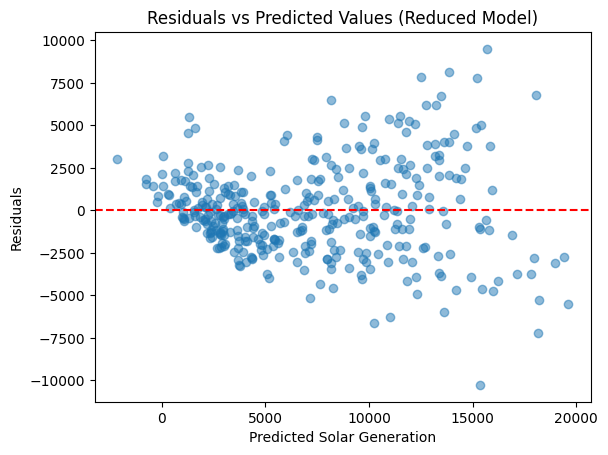

In [24]:
import matplotlib.pyplot as plt

# Get predicted values from reduced model
predicted_reduced = results_reduced.predict(X_reduced)

# Calculate residuals for reduced model
residuals_reduced = y - predicted_reduced

# Plot residuals vs predicted values
plt.scatter(predicted_reduced, residuals_reduced, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Solar Generation')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Reduced Model)')

plt.show()


Observation: A widening of the spread of residuals as the fitted values increase indicates non-constant variance (heteroscedasticity).  
The above graph suggests heteroscedasticity in the model.

### Q-Q Plot  
Check normality of residuals

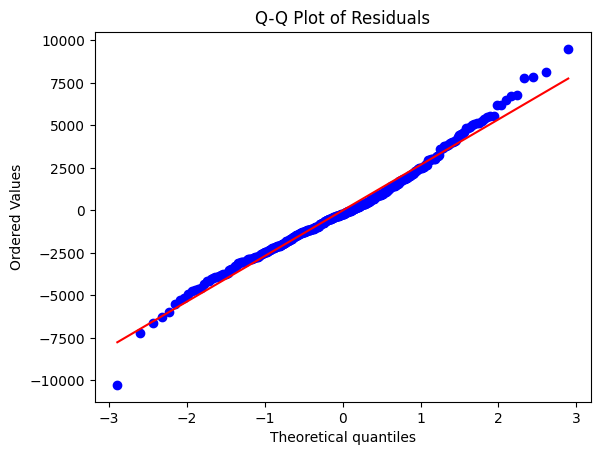

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = results_reduced.resid

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.show()


Observation: Data points closely follow the diagonal line, tailing off slightly at the ends.  
This indicates that the observed data is evenly distributed.

### Histogram   
Check distribution of residuals

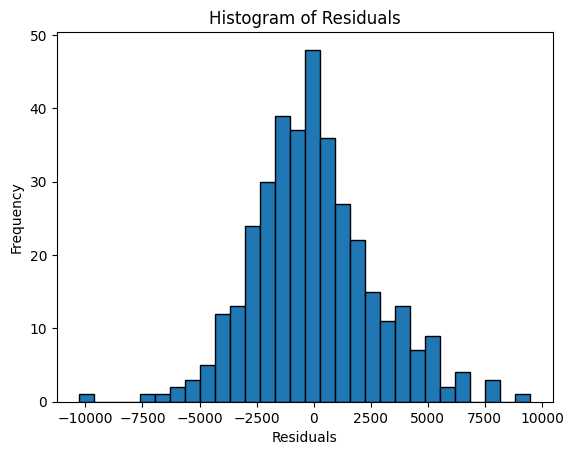

In [26]:
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")



plt.show()

Observation: The histogram is roughly bell shaped, confirming findings from Q-Q plot.  
This indicates the data is evenly distributed.

### VIF  
Check multicollinearity of predictors

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the constant when calculating VIF
X_vif = X_reduced.drop(columns='const')
vif_data = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_data)

  feature        VIF
0    rain   1.671338
1   maxtp  24.632700
2   mintp  12.440431
3  glorad   6.198268


Observation: Applying the interpretation guide of: VIF ≈ 1: No collinearity, VIF > 5: Potential concern, VIF > 10: Serious issue.  

- glorad shows potential collinarity but remains in a safe zone (VIF 6.2).  

- maxtp and mintp are likely correlated as both are temperature and show a serious issue. (VIF maxtp = 24.63, mintp = 12.44)   
This Multicollinearity inflates standard errors and makes interpretation unstable.

Next step: check correlation between maxtp and mintp


In [28]:
df[['maxtp', 'mintp']].corr()

,maxtp,mintp
maxtp,1.000000,0.819987
mintp,0.819987,1.000000


Observation: maxtp and mintp are clearly highly correlated.  

As maxtp's R² (0.495) indicates it explains nearly 50% of the variation in solar generation.
While mintp's R² (0.094) indicates it only explains under 10% of the variation in solar generation.

mintp will be dropped from the model for this proof of concept linear regression model.  
It may later be added back in when more complex models are fitted such as Random Forest which is not sensitive to multicollinearity.

next step: Fit new model without mintp and observe results.

## Fit OLS model (reduced2)  
- Drop mintemp from new model as it is likely redundant  
- Observe affect on model correlation

### Fit reduced2 model using: rain, maxtp, glorad

In [29]:
# Drop 'mintp' due to possible redundancy
X_reduced2 = df[['rain', 'maxtp', 'glorad']]
X_reduced2 = sm.add_constant(X_reduced2)
y = df['solargen']

# fit model
model_reduced2 = sm.OLS(y, X_reduced2)
results_reduced2 = model_reduced2.fit()

# View summary
results_reduced2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               solargen   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     348.0
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          2.88e-106
Time:                        13:03:15   Log-Likelihood:                -3418.7
No. Observations:                 366   AIC:                             6845.
Df Residuals:                     362   BIC:                             6861.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2143.5579    531.838     -4.030      0.000   -3189.438   -1097.677
rain        -168.6627     41.977     -4.018      0.000    -251.212     -86.114
maxtp        381.6842     46.778      8.159      0.000     289.693     473.675
glorad         4.8599      0.300     16.191      0.000       4.270       5.450
==============================================================================
Omnibus:                       15.931   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.923
Skew:                           0.338   Prob(JB):                     1.05e-05
Kurtosis:                       4.023   Cond. No.                     4.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

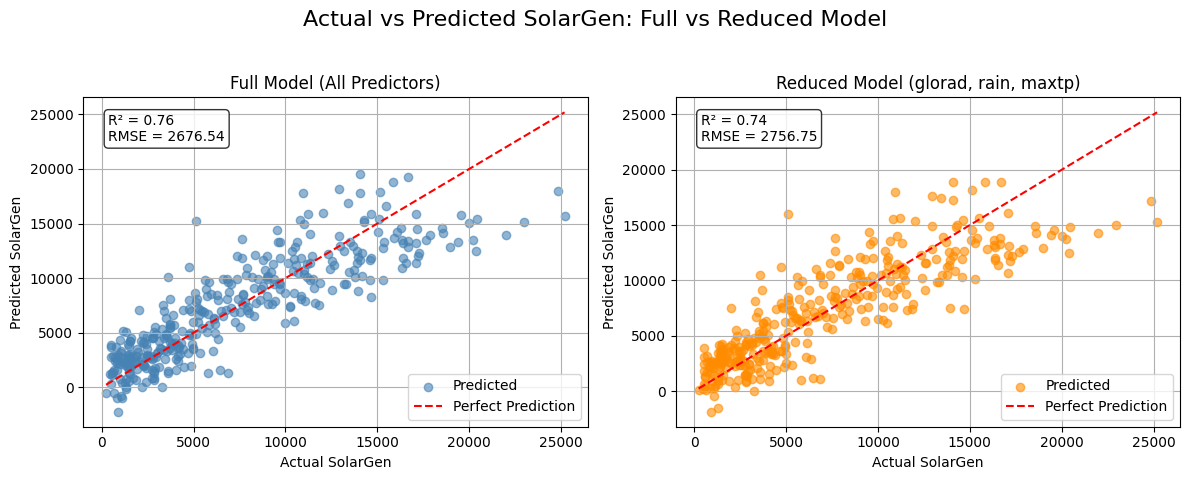

In [32]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_pred_full = results_full.predict(X)
y_pred_reduced = results_reduced2.predict(X_reduced2)  # <- Ensure these variables exist

# R² and RMSE
r2_full = r2_score(y, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y, y_pred_full))

r2_reduced = r2_score(y, y_pred_reduced)
rmse_reduced = np.sqrt(mean_squared_error(y, y_pred_reduced))

# Plot
plt.figure(figsize=(12, 5))

# --- Full Model ---
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_full, alpha=0.6, color='steelblue', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual SolarGen')
plt.ylabel('Predicted SolarGen')
plt.title('Full Model (All Predictors)')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {r2_full:.2f}\nRMSE = {rmse_full:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# --- Reduced Model ---
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_reduced, alpha=0.6, color='darkorange', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual SolarGen')
plt.ylabel('Predicted SolarGen')
plt.title('Reduced Model (glorad, rain, maxtp)')
plt.legend()
plt.grid(True)
plt.text(0.05, 0.95, f'R² = {r2_reduced:.2f}\nRMSE = {rmse_reduced:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.suptitle('Actual vs Predicted SolarGen: Full vs Reduced Model', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot
plt.savefig('../Outputs/actual_vs_predicted_full_vs_reduced.png', dpi=300, bbox_inches='tight')

plt.show()


### Observe reduce2 VIF data

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the constant when calculating VIF
X_vif = X_reduced2.drop(columns='const')
vif_data = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
print(vif_data)

  feature       VIF
0    rain  1.641380
1   maxtp  6.867613
2  glorad  5.473113


Observation: The reduced2 model, excluding mintp, explains 74.3% of the variation in solar generation (R² = 0.743, p < 0.001), showing a slight decrease in explanatory power compared to the previous model of 1.3%.

Dropping mintp leads to a notable improvement in multicollinearity, with VIF values for remaining predictors reduced to acceptable levels (maxtp VIF = 6.87).

This trade-off between a small loss in R² and improved model stability and interpretability suggests that excluding mintp is beneficial for building a more reliable regression model.

Next step: Address heteroscedasticity in the model.

## Addressing heteroscedasticity within current OLS model  
- Apply log-transform on solargen
- Refit model
- Plot residual vs fitted values
- Observe results

Apply log transformation on target variable: solargen  
refit new log model

In [34]:
# Step 1: Log-transform the response variable
y_log = np.log(df['solargen'])

# Define predictors as before (reduced2)
X_model_log_solargen = df[['rain', 'maxtp', 'glorad']]
X_model_log_solargen = sm.add_constant(X_model_log_solargen)

# Fit the model with log-transformed response
model_log = sm.OLS(y_log, X_model_log_solargen)
results_log = model_log.fit()

### Plot residual vs fitted graph for model_log_solargen

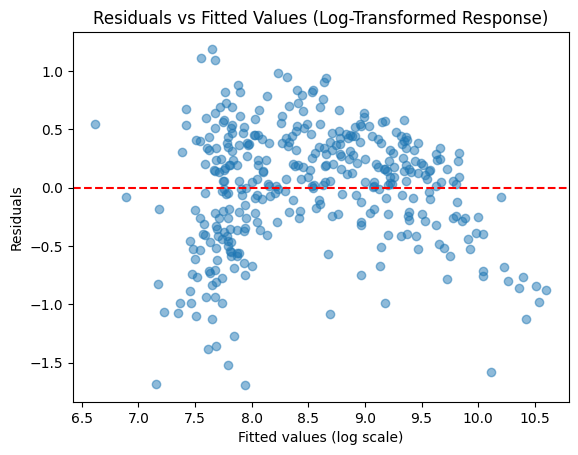

In [35]:
# Predictions and residuals
fitted_log = results_log.fittedvalues
residuals_log = results_log.resid

# Plot residuals vs fitted values
plt.scatter(fitted_log, residuals_log, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values (log scale)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Log-Transformed Response)')


# # Save the figure before plt.show
# plot_path = os.path.join("../Outputs/Figures/Diagnostics/Model_log_solargen", "residuals_vs_predicted_model_log_solargen.png")
# plt.savefig(plot_path, dpi=300, bbox_inches='tight')

plt.show()


Observation: 
- The log transformation of the solargen response has improved the residual distribution, addressing the heteroscedasticity observed in previous models.  
- While some vertical spread remains, particularly in lower predicted values, the transformation results in more stable variance across the range of fitted values.
- The model’s R² (0.708) is slightly lower than reduced2 model but the benefit of satisfying key linear regression assumptions justifies this trade-off.

Note: Predictions from this model will need to be back-transformed to return to the original MWh scale for the intended forecasting task.


### Plot Q-Q residuals graph for model_log_solargen

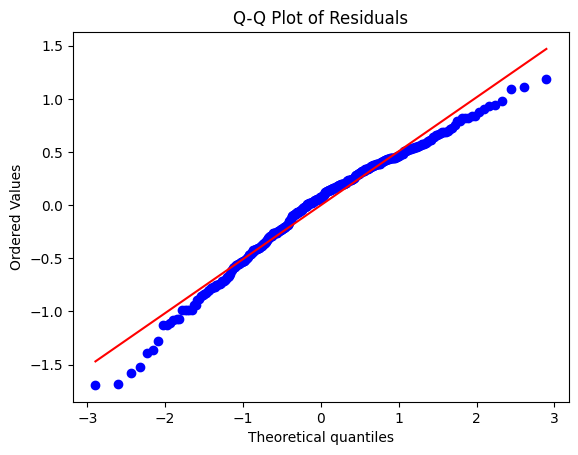

In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = residuals_log

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")


# Save the figure before plt.show
plot_path = os.path.join("../Outputs/Figures/Diagnostics/Model_log_solargen", "Q-Q_plot_residuals_model_log_solargen.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()


### Plot residuals histogram for model_log_solargen

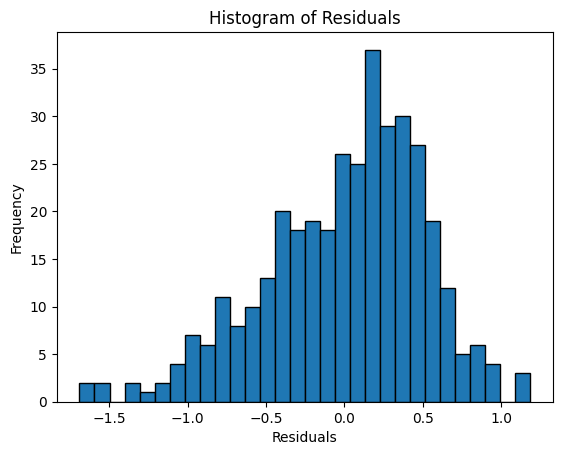

In [37]:
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Save the figure before plt.show
plot_path = os.path.join("../Outputs/Figures/Diagnostics/Model_log_solargen", "histogram_residuals_model_log_solargen.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

### Observations for model_log_solargen graphs

- The Q-Q plot shows residuals closely following the normal line in the center, though:  
The left tail dips slightly below the line, indicating mild left skew.  
The right tail also dips under the line, contrasting the earlier upward deviation in reduced2
- The histogram of residuals remains approximately bell-shaped, though:  
It is now slightly skewed to the left, consistent with the Q-Q plot.  
The distribution still broadly resembles normality, supporting the model's validity.

- Compared to the earlier, untransformed models:  
The residual spread is more even, suggesting an improvement in homoscedasticity.  
The normality of residuals has slightly decreased due to the log transformation.

- Trade-off:
The log transformation improved variance stability (a more critical issue) at the expense of a minor increase in skewness.
This trade off is acceptible and so, model_log_solargen appears to be the reasonable choice for model training


## Comparing current models to gain further insights 
- Import Sklearn
- Calculate RMSE and MAE for reduced2 and model_solar_loggen
- Plot Actual vs predicted values in order to visualise both
- Observe results

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Predict log(solargen)
log_predictions = results_log.predict(X_model_log_solargen)

# Convert back to original scale
predicted_solargen = np.exp(log_predictions)

# Actual solargen
actual_solargen = df['solargen'].values

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual_solargen, predicted_solargen))
mae = mean_absolute_error(actual_solargen, predicted_solargen)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 4337.00
MAE: 2636.23


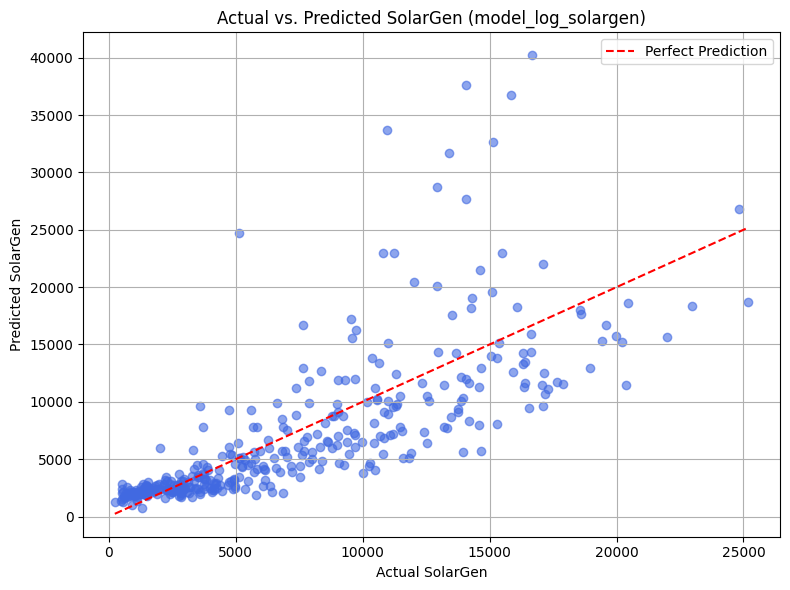

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_solargen, predicted_solargen, alpha=0.6, color='royalblue')
plt.plot([actual_solargen.min(), actual_solargen.max()],
         [actual_solargen.min(), actual_solargen.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual SolarGen')
plt.ylabel('Predicted SolarGen')
plt.title('Actual vs. Predicted SolarGen (model_log_solargen)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# Predict using reduced2 model
predicted_reduced2 = results_reduced2.predict(X_reduced2)

# Actual values
actual_solargen = df['solargen'].values

# Calculate RMSE and MAE
rmse_reduced2 = np.sqrt(mean_squared_error(actual_solargen, predicted_reduced2))
mae_reduced2 = mean_absolute_error(actual_solargen, predicted_reduced2)

print(f"Reduced2 RMSE: {rmse_reduced2:.2f}")
print(f"Reduced2 MAE: {mae_reduced2:.2f}")


Reduced2 RMSE: 2756.75
Reduced2 MAE: 2105.45


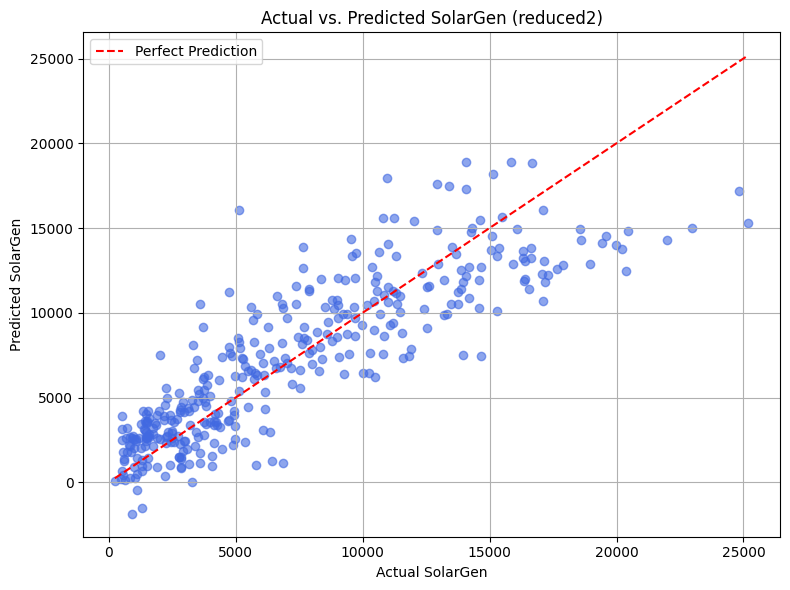

In [40]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_solargen, predicted_reduced2, alpha=0.6, color='royalblue')
plt.plot([actual_solargen.min(), actual_solargen.max()],
         [actual_solargen.min(), actual_solargen.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual SolarGen')
plt.ylabel('Predicted SolarGen')
plt.title('Actual vs. Predicted SolarGen (reduced2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations
This demonstrates a bias-variance tradeoff:

- model_log_solargen: Lower variance, better-behaved residuals, worse predictive performance.

- reduced2: Slightly more residual issues, but significantly better predictive accuracy.

Note: Given the prediction range of solargen (230 to 25,000), even the reduced2 model still has room for improvement.


## Apply Polynominal Regression to the Strongest Predictor to Gain Precision.

### Apply Polynomial Regression on Strongest Predictor (GloRad)
- Add a quadratic term for 'glorad' to account for non-linear effects in solar generation.
- This aims to improve model performance in higher radiation ranges where the linear model underpredicts.
- Observe results.


In [41]:
# Define predictors (include glorad^2)
df['glorad_sq'] = df['glorad'] ** 2

# Model inputs
X_poly = df[['rain', 'maxtp', 'glorad', 'glorad_sq']]
X_poly = sm.add_constant(X_poly)

# Response
y = df['solargen']

# Fit the model
model_poly = sm.OLS(y, X_poly).fit()

print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:               solargen   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     278.6
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          5.89e-109
Time:                        13:05:01   Log-Likelihood:                -3409.4
No. Observations:                 366   AIC:                             6829.
Df Residuals:                     361   BIC:                             6848.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2902.7446    547.708     -5.300      0.0

### Evaluate RMSE and MAE for model_poly

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions using the fitted polynomial model
y_pred_poly = model_poly.predict(X_poly)

# Calculate RMSE and MAE
rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))
mae_poly = mean_absolute_error(y, y_pred_poly)

print(f"Quadratic Model RMSE: {rmse_poly:.2f}")
print(f"Quadratic Model MAE: {mae_poly:.2f}")

Quadratic Model RMSE: 2687.25
Quadratic Model MAE: 2041.25


### Visualise actual v predicted for model_poly

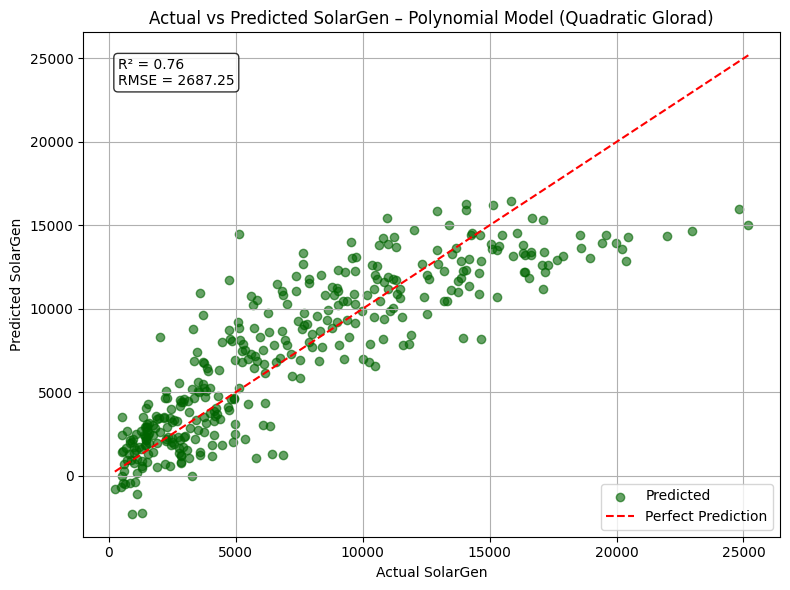

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R² and RMSE
r2 = r2_score(y, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred_poly))

# --- Clean single plot ---
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_poly, alpha=0.6, color='darkgreen', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual SolarGen')
plt.ylabel('Predicted SolarGen')
plt.title('Actual vs Predicted SolarGen – Polynomial Model (Quadratic Glorad)')
plt.legend()
plt.grid(True)

# Add R² and RMSE annotation
plt.text(0.05, 0.95, f'R² = {r2:.2f}\nRMSE = {rmse:.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## Observations

- Reduced2 -     	(RMSE: 2756.75)	- (MAE: 2105.45)
- Log-transformed -	(RMSE: 4337.00) - (MAE: 2636.23)
- Quadratic Model -	(RMSE: 2687.25)	- (MAE: 2041.25)

- The Quadratic Model performs best so far in terms of both RMSE and MAE.

- This suggests that introducing non-linearity (via a polynomial term) better captures the relationship between predictors and solargen.

-The Quadratic Model avoids transformation artifacts (like log-scale back-transform issues), and improves predictive accuracy.

### Conduct Anova test for reduced2 v model_poly

In [44]:
anova_lm(results_reduced2, model_poly)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,362.0,2.781489e+09,0.0,NaN,NaN,NaN
1,361.0,2.643003e+09,1.0,1.384861e+08,18.915417,0.000018


### Anova Result
- F-statistic = 18.92: A high number that suggest meaningful improvement
- P-value - 0.000018: Meaning the improvement is statistically significant.

## Create Plots for Current Findings

### Residuals vs Predicted (Full, Reduced2, Poly)

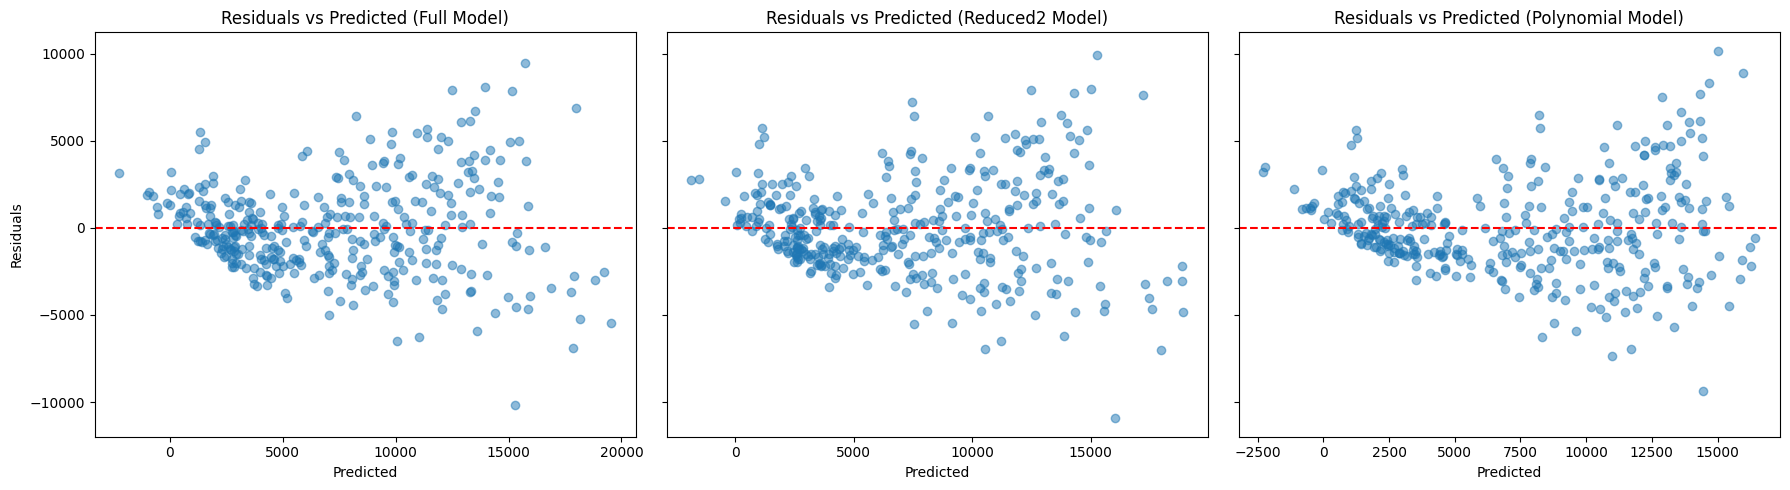

In [46]:
# Generate predictions and residuals
pred_full = results_full.predict(X)
resid_full = y - pred_full

pred_reduced2 = results_reduced2.predict(X_reduced2)
resid_reduced2 = y - pred_reduced2

pred_poly = model_poly.predict(X_poly)
resid_poly = y - pred_poly

# Plot all three residual plots side-by-side
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axs[0].scatter(pred_full, resid_full, alpha=0.5)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title('Residuals vs Predicted (Full Model)')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Residuals')

axs[1].scatter(pred_reduced2, resid_reduced2, alpha=0.5)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title('Residuals vs Predicted (Reduced2 Model)')
axs[1].set_xlabel('Predicted')

axs[2].scatter(pred_poly, resid_poly, alpha=0.5)
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuals vs Predicted (Polynomial Model)')
axs[2].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('../Outputs/Figures/Diagnostics/Fig6_Residuals_Comparison.png', dpi=300)
plt.show()

### Actual vs Predicted SolarGen

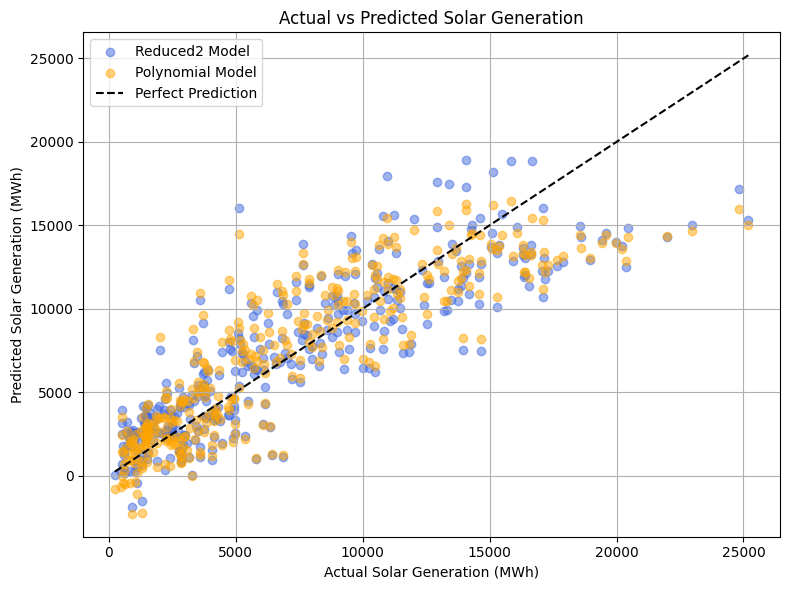

In [47]:
import matplotlib.pyplot as plt

# Actual values (same for both)
actual = y

# Predicted values
pred_reduced2 = results_reduced2.predict(X_reduced2)
pred_poly = model_poly.predict(X_poly)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual, pred_reduced2, alpha=0.5, label='Reduced2 Model', color='royalblue')
plt.scatter(actual, pred_poly, alpha=0.5, label='Polynomial Model', color='orange')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()],
         color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Solar Generation (MWh)')
plt.ylabel('Predicted Solar Generation (MWh)')
plt.title('Actual vs Predicted Solar Generation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../Outputs/Figures/Diagnostics/Fig7_Actual_vs_Predicted.png', dpi=300)
plt.show()

### Bar chart comparing RMSE and MAE across Model_Full, Model_Reduced2, and Model_Poly

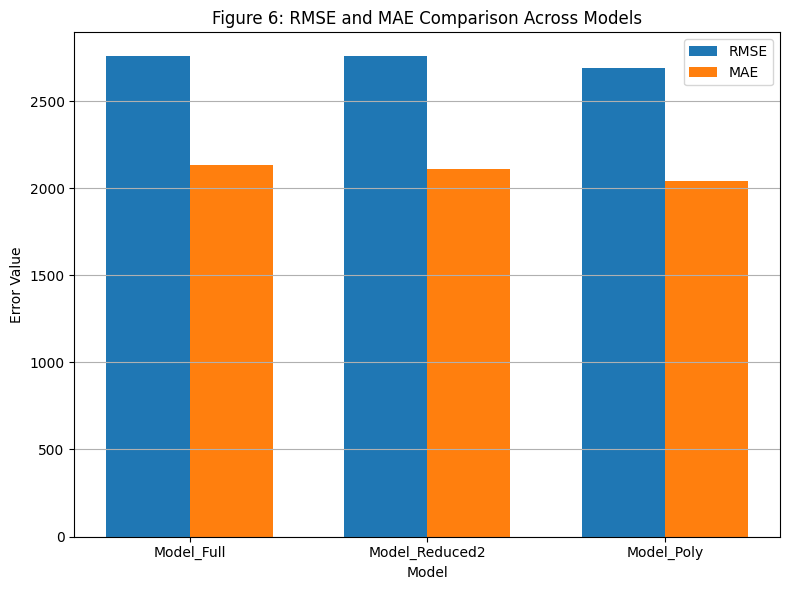

In [48]:
# Define model labels
models = ['Model_Full', 'Model_Reduced2', 'Model_Poly']

# Entered the RMSE and MAE values manually
rmse_values = [2756.75, 2756.0, 2687.25]
mae_values = [2131.42, 2110.56, 2041.25]

# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for RMSE and MAE
bars1 = ax.bar(index, rmse_values, bar_width, label='RMSE')
bars2 = ax.bar(index + bar_width, mae_values, bar_width, label='MAE')

# Add labels, title, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Error Value')
ax.set_title('Figure 6: RMSE and MAE Comparison Across Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Display grid
ax.yaxis.grid(True)

# Save figure
plt.tight_layout()
plt.savefig('../Outputs/Figures/Diagnostics/Fig6_RMSE_MAE_Comparison.png', dpi=300)
plt.show()

### ANOVA comparison between Model_Reduced2 and Model_Poly, based on the statsmodels anova_lm

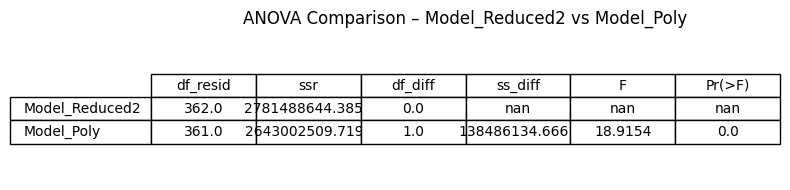

In [51]:
# Perform ANOVA
anova_df = anova_lm(results_reduced2, model_poly)
anova_df_rounded = anova_df.round(4)

# Rename index rows for clarity
anova_df_rounded.index = ['Model_Reduced2', 'Model_Poly']

# Plot as a table
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')

table = ax.table(
    cellText=anova_df_rounded.values,
    colLabels=anova_df_rounded.columns,
    rowLabels=anova_df_rounded.index,
    loc='center',
    cellLoc='center'
)

table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.title('ANOVA Comparison – Model_Reduced2 vs Model_Poly', fontsize=12, pad=10)

# Save figure
plt.tight_layout()
plt.savefig('../Outputs/Figures/Diagnostics/Fig9_ANOVA_Comparison_Table.png', dpi=300)
plt.show()

### Histogram + Q-Q Plot of Residuals (Model_Poly)

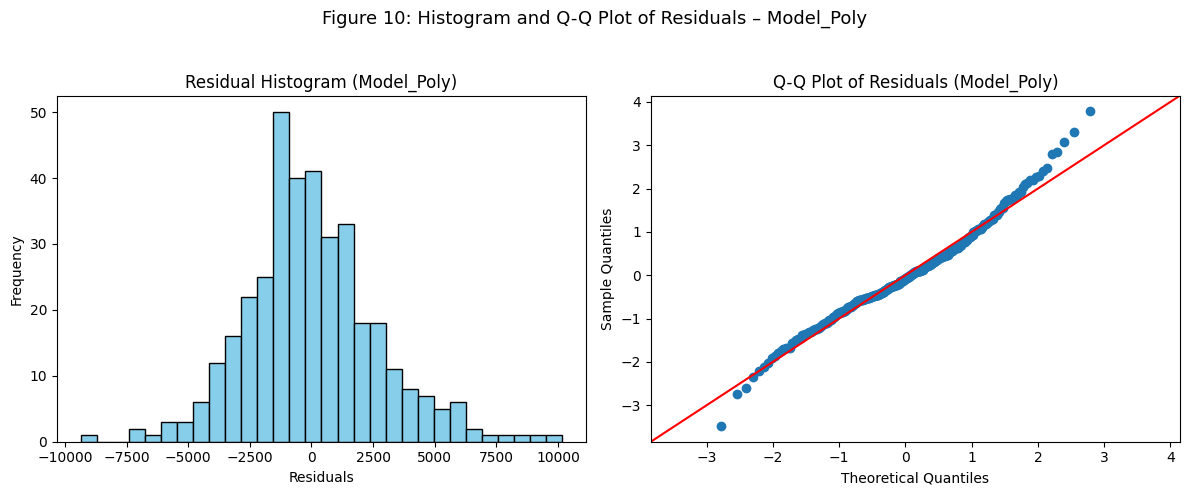

In [53]:
# Residuals from polynomial model
residuals_poly = model_poly.resid

# Create subplots: Histogram + Q-Q plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
axes[0].hist(residuals_poly, bins=30, edgecolor='black', color='skyblue')
axes[0].set_title('Residual Histogram (Model_Poly)')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Q-Q plot (must be created directly on the given axis)
sm.qqplot(residuals_poly, line='45', ax=axes[1], fit=True)
axes[1].set_title('Q-Q Plot of Residuals (Model_Poly)')

# Final touches
fig.suptitle('Figure 10: Histogram and Q-Q Plot of Residuals – Model_Poly', fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../Outputs/Figures/Diagnostics/Fig10_Residuals_Hist_QQ_ModelPoly.png', dpi=300)
plt.show()

### Create a table to summarise the performance of models (Model_Full, Model_Reduced2, and Model_Poly) using the R², Adjusted R², RMSE and MAE

In [54]:
# Predictions
y_pred_full = results_full.predict(X)
y_pred_reduced2 = results_reduced2.predict(X_reduced2)
y_pred_poly = model_poly.predict(X_poly)

# Compute metrics
def model_metrics(y_true, y_pred, model):
    r2 = model.rsquared
    adj_r2 = model.rsquared_adj
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return [r2, adj_r2, rmse, mae]

# Create table
metrics_df = pd.DataFrame({
    "Model": ["Model_Full", "Model_Reduced2", "Model_Poly"],
    "R²": model_metrics(y, y_pred_full, results_full)[0:1] + model_metrics(y, y_pred_reduced2, results_reduced2)[0:1] + model_metrics(y, y_pred_poly, model_poly)[0:1],
    "Adjusted R²": model_metrics(y, y_pred_full, results_full)[1:2] + model_metrics(y, y_pred_reduced2, results_reduced2)[1:2] + model_metrics(y, y_pred_poly, model_poly)[1:2],
    "RMSE": model_metrics(y, y_pred_full, results_full)[2:3] + model_metrics(y, y_pred_reduced2, results_reduced2)[2:3] + model_metrics(y, y_pred_poly, model_poly)[2:3],
    "MAE": model_metrics(y, y_pred_full, results_full)[3:4] + model_metrics(y, y_pred_reduced2, results_reduced2)[3:4] + model_metrics(y, y_pred_poly, model_poly)[3:4]
})

# Save as CSV
metrics_df.to_csv('../Outputs/Figures/Diagnostics/Table1_Model_Performance_Metrics.csv', index=False)

# Display
print("Table 1: Model Performance Metrics")
print(metrics_df)

Table 1: Model Performance Metrics
            Model        R²  Adjusted R²         RMSE          MAE
0      Model_Full  0.757297     0.753926  2676.537705  2044.976290
1  Model_Reduced2  0.742531     0.740398  2756.754568  2105.450067
2      Model_Poly  0.755350     0.752640  2687.251074  2041.254163


### Create table to compare VIF for Model_Full and Model_Reduced2

In [55]:
# Remove constant before calculating VIF
X_full_vif = X.drop(columns='const')
X_reduced2_vif = X_reduced2.drop(columns='const')

# VIF for Model_Full
vif_full = pd.DataFrame({
    'Model': 'Model_Full',
    'Feature': X_full_vif.columns,
    'VIF': [variance_inflation_factor(X_full_vif.values, i) for i in range(X_full_vif.shape[1])]
})

# VIF for Model_Reduced2
vif_reduced2 = pd.DataFrame({
    'Model': 'Model_Reduced2',
    'Feature': X_reduced2_vif.columns,
    'VIF': [variance_inflation_factor(X_reduced2_vif.values, i) for i in range(X_reduced2_vif.shape[1])]
})

# Combine both
vif_table = pd.concat([vif_full, vif_reduced2], ignore_index=True)

# Save to CSV
vif_table.to_csv('../Outputs/Figures/Diagnostics/Table2_VIF_Scores.csv', index=False)

print(vif_table)

            Model Feature        VIF
0      Model_Full    rain   1.699142
1      Model_Full   maxtp  78.012260
2      Model_Full   mintp  17.638782
3      Model_Full     cbl  19.015552
4      Model_Full  glorad   7.596205
5  Model_Reduced2    rain   1.641380
6  Model_Reduced2   maxtp   6.867613
7  Model_Reduced2  glorad   5.473113


## Test whether rain, maxtp, and mintp can predict glorad via OLS regression.

In [58]:
X_predict_glorad = df[['rain', 'maxtp', 'mintp']]
X_predict_glorad = sm.add_constant(X_predict_glorad)
y_glorad = df['glorad']

# Fit model
model_stage1_glorad = sm.OLS(y_glorad, X_predict_glorad)
results_stage1_glorad = model_stage1_glorad.fit()

# View summary
results_stage1_glorad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 glorad   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           7.04e-74
Time:                        14:16:23   Log-Likelihood:                -2731.1
No. Observations:                 366   AIC:                             5470.
Df Residuals:                     362   BIC:                             5486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -772.9110     87.617     -8.821      0.000    -945.213    -600.609
rain         -33.4276      6.171     -5.417      0.000     -45.563     -21.292
maxtp        186.2185      9.372     19.869      0.000     167.787     204.650
mintp       -107.7634     10.120    -10.649      0.000    -127.665     -87.862
==============================================================================
Omnibus:                        0.486   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.363
Skew:                           0.072   Prob(JB):                        0.834
Kurtosis:                       3.055   Cond. No.                         65.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results

- R² = 0.611
- P values < 0.001
- F-stat = 189.6

These results confirm that the stage 1 model (predicting glorad) is statistically solid and justifies the two-stage pipeline approach. 